# **SIMPLE LINEAR REGRESSION USING ORDINARY LEAST SQUARES**

# [Kaggle](https://www.kaggle.com/code/avd1729/simple-linear-regression-using-ols)

# **Setting up the environment**

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv")

# **Building a regression model**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
import statsmodels.api as sm
X = sm.add_constant(data['YearsExperience'])
X.head(5)

,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2


In [5]:
y = data['Salary']

# **Train-Test Split**

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,train_size = 0.7 , random_state = 42)

In [7]:
salary_lm = sm.OLS(y_train , X_train).fit()

# **Model Diagnostics**

In [8]:
salary_lm.params

const              25918.438335
YearsExperience     9339.081724
dtype: float64

In [9]:
salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.955     
Dependent Variable:   Salary             AIC:                  424.3780  
Date:                 2023-04-15 05:47   BIC:                  426.4670  
No. Observations:     21                 Log-Likelihood:       -210.19   
Df Model:             1                  F-statistic:          427.6     
Df Residuals:         19                 Prob (F-statistic):   1.74e-14  
R-squared:            0.957              Scale:                3.1967e+07
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const           25918.4383 2507.5217 10.3363 0.0000 20670.1352 31166.7415
YearsExperience  9339.0817  451.6530 20.6776 0.0000  8393.7612 10284.4023
-------------------------------------------------------------------------
Omnibus:                  0.532          Durbin-Watson:             1.883
Prob(Omnibus):            0.766          Jarque-Bera (JB):          0.625
Skew:                     0.281          Prob(JB):                  0.732
Kurtosis:                 2.368          Condition No.:             12   
=========================================================================

"""

# **Residual analysis**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# **1.Check for Normal Distribution of Residual**

<Figure size 1000x800 with 0 Axes>

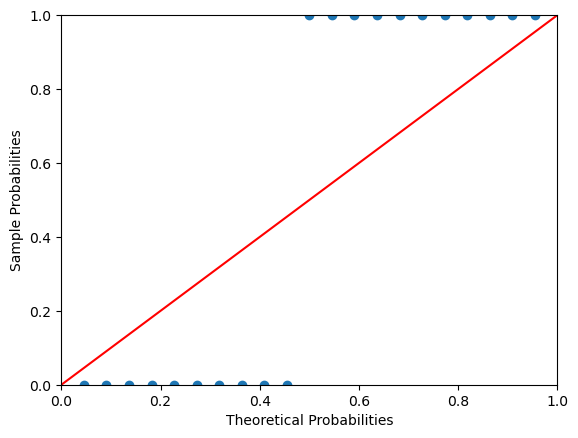

In [11]:
from scipy import stats

resid = salary_lm.resid
probplot = sm.ProbPlot(np.array(resid))
plt.figure(figsize=(10,8))
probplot.ppplot(line='45')
plt.show()

 >  We find that the residuals doesn't follow normal distribution , this maybe due to outliers or insufficient data 

# **2.Test for Homoscedasticity**

In [12]:
def get_standarized_values(vals):
    return (vals - vals.mean())/vals.std()

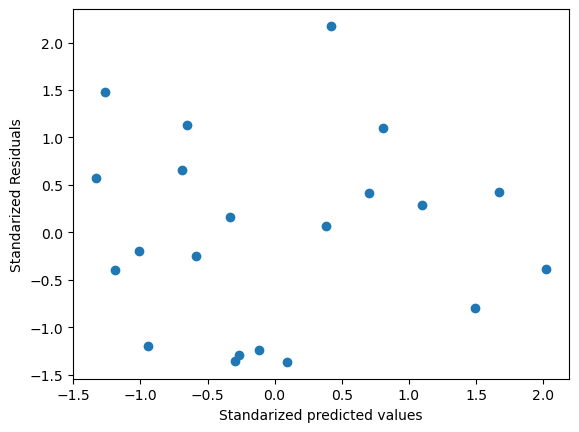

In [13]:
plt.scatter(get_standarized_values(salary_lm.fittedvalues) , get_standarized_values(resid))
plt.xlabel("Standarized predicted values")
plt.ylabel("Standarized Residuals")
plt.show()

 > It can be observed that the residuals are random and have no funnel shape , which means the residuals have constant variance (homoscedasticity)

# **Outlier Analysis**

# **1.Z-Score**

In [14]:
from scipy.stats import zscore
data['z_score_salary'] = zscore(data.Salary)
data[(data.z_score_salary > 3.0) | (data.z_score_salary < -3.0)]

,YearsExperience,Salary,z_score_salary


> There are no observations that are outliers as per Z-Score

# **2.Cook's Distance**

Text(0, 0.5, 'Cooks Distance')

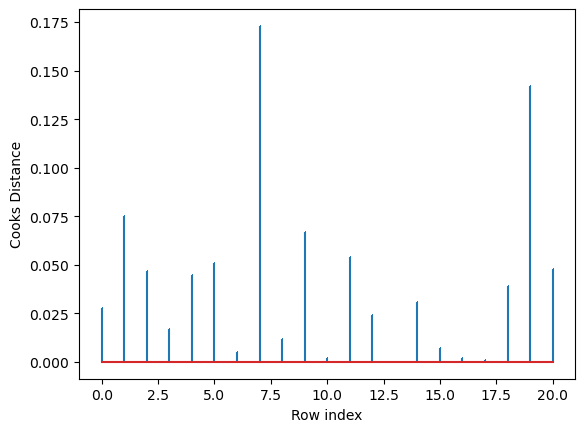

In [15]:
data_influence = salary_lm.get_influence()
(c,p) = data_influence.cooks_distance
plt.stem(np.arange(len(X_train)), np.round(c,3) , markerfmt=",")
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")

> It can be observed that 2 of the observations' Cook distance exceed 1 and hence they are outliers 

In [16]:
'''
X_train = X_train.drop([7,19] , axis=0)
y_train = y_train.drop([7,19] , axis=0)
'''

'\nX_train = X_train.drop([7,19] , axis=0)\ny_train = y_train.drop([7,19] , axis=0)\n'

# **3.Leverage values**

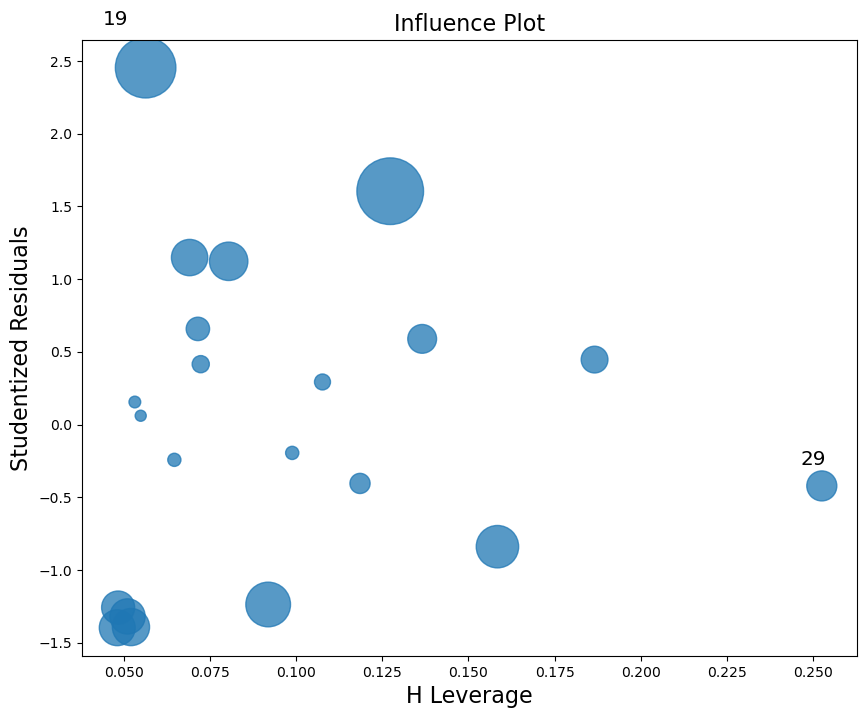

In [17]:
from statsmodels.graphics.regressionplots import influence_plot
fig ,ax = plt.subplots(figsize=(10,8))
influence_plot( salary_lm , ax=ax)
plt.show()

> The size of the circle is proportional to the product of residual and leverage values , larger the circle , the larger
the residual and hence larger the influence of the observation

# **Prediction**

In [18]:
y_pred = salary_lm.predict(X_test)

# **Finding R-Squared and RMSE**

In [19]:
from sklearn.metrics import r2_score , mean_squared_error
r2_score(y_test , y_pred)
#r2_score(y_pred , y_test) slightly different

0.9414466227178215

In [20]:
np.sqrt(mean_squared_error(y_test , y_pred))

6146.923007994572